Timo Weber, Alassane Diagne

In [1]:
import scipy.linalg as la
import numpy as np
from numpy.linalg import cond
from time import process_time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def solve_lsq(A, b, method = "qr"):
    m,n = A.shape
    if method == "normal":
        x = la.solve(A.T @ A, A.T @ b)
    elif method == "qr":
        Q, R = la.qr(A)
        c = Q.T @ b
        x = la.solve_triangular(R[:n, :], c[:n])
    elif method == "svd":
        U, S, V = la.svd(A)
        S_plus = np.zeros((n,m))
        for i in range(min(m,n)):
            if S[i] == 0:
                continue
            else:
                S_plus[i,i] = 1/S[i]
        x = V.T @ S_plus @ U.T @ b
    else:
        raise ValueError("Invalid method. Should be either \"normal\", \"qr\" or \"svd\" ")
    return(x)

In [3]:
def example(m, n):
    A = np.vander(np.linspace(-1., 1., m),n)
    b = A.dot (np.ones(n))
    return A, b

In [4]:
mat, vec = example(100,20)
solve_lsq(mat, vec, 'svd')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [5]:
condition = []
normal_time = []
normal_err = []
qr_time = []
qr_err = []
svd_time = []
svd_err = []
ns = np.arange(1,101)
for n in ns:
    A, b = example(100,n)
    condition.append(cond(A))
    time1_normal = process_time()
    x = solve_lsq(A,b, method="normal")
    time2_normal = process_time()
    normal_time.append(time2_normal-time1_normal)
    normal_err.append(np.sum((x-1)**2))

    time1_qr = process_time()
    x = solve_lsq(A,b, method="qr")
    time2_qr = process_time()
    qr_time.append(time2_qr - time1_qr)
    qr_err.append(np.sum((x-1)**2))

    time1_svd = process_time()
    x = solve_lsq(A,b, method="svd")
    time2_svd = process_time()
    svd_time.append(time2_svd-time1_svd)
    svd_err.append(np.sum((x-1)**2))

/var/folders/kf/2r_v79wn3v1g_w1ngzsh6vlm0000gn/T/ipykernel_28946/2001585751.py:4: LinAlgWarning: Ill-conditioned matrix (rcond=3.50672e-17): result may not be accurate.
  x = la.solve(A.T @ A, A.T @ b)
/var/folders/kf/2r_v79wn3v1g_w1ngzsh6vlm0000gn/T/ipykernel_28946/2001585751.py:4: LinAlgWarning: Ill-conditioned matrix (rcond=8.27661e-18): result may not be accurate.
  x = la.solve(A.T @ A, A.T @ b)
/var/folders/kf/2r_v79wn3v1g_w1ngzsh6vlm0000gn/T/ipykernel_28946/2001585751.py:4: LinAlgWarning: Ill-conditioned matrix (rcond=2.28999e-18): result may not be accurate.
  x = la.solve(A.T @ A, A.T @ b)
/var/folders/kf/2r_v79wn3v1g_w1ngzsh6vlm0000gn/T/ipykernel_28946/2001585751.py:4: LinAlgWarning: Ill-conditioned matrix (rcond=2.01957e-18): result may not be accurate.
  x = la.solve(A.T @ A, A.T @ b)
/var/folders/kf/2r_v79wn3v1g_w1ngzsh6vlm0000gn/T/ipykernel_28946/2001585751.py:4: LinAlgWarning: Ill-conditioned matrix (rcond=7.81746e-19): result may not be accurate.
  x = la.solve(A.T @ A,

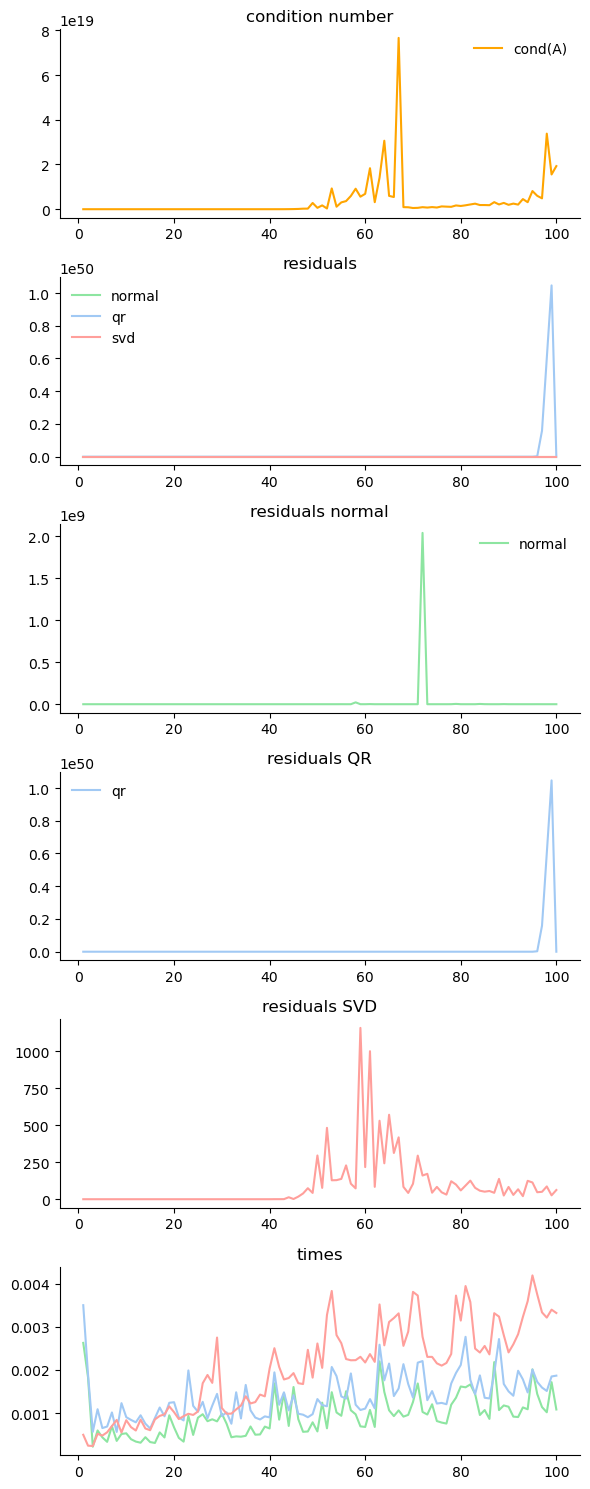

In [6]:
sns.set_palette("pastel", n_colors=4, desat=None, color_codes=True)

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6,1, figsize=(6,15))

ax1.title.set_text("condition number")
ax2.title.set_text("residuals")
ax3.title.set_text("residuals normal")
ax4.title.set_text("residuals QR")
ax5.title.set_text("residuals SVD")
ax6.title.set_text("times")

ax1.plot(ns, condition, label='cond(A)', color="orange")

ax2.plot(ns, normal_err, label = 'normal', color = 'g')
ax2.plot(ns, qr_err, label = 'qr', color = 'b')
ax2.plot(ns, svd_err, label = 'svd', color = 'r')

ax3.plot(ns, normal_err, label = 'normal', color = 'g')
ax4.plot(ns, qr_err, label = 'qr', color = 'b')
ax5.plot(ns, svd_err, label = 'svd', color = 'r')

ax6.plot(ns, normal_time, label = 'normal', color = 'g')
ax6.plot(ns, qr_time, label = 'qr', color = 'b' )
ax6.plot(ns, svd_time, label = 'svd', color = 'r')

for ax in [ax1,ax2,ax3, ax4]:
    ax.legend(frameon=False)
sns.despine()
fig.tight_layout()
plt.show()

The QR and normal least squares solutions perform generally good but then yield terrible results for $n\approx 98$ or $70$ respectively. Meanwhile the SVD solution performs well for any $n$,however takes the longstest to compute